In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Reading the dataset
data=pd.read_csv('/content/cleaned_movie_data_with_movie_title.csv')
data.head()

,Unnamed: 0,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,movie_category
0,0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Fantasy,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,hit
1,1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,hit
2,2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Adventure,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,hit
3,3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,hit
4,5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Adventure,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,hit


In [3]:
#Shape of the dataset
data.shape

(3756, 28)

In [4]:
#Information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3756 non-null   int64  
 1   director_name              3756 non-null   object 
 2   num_critic_for_reviews     3756 non-null   float64
 3   duration                   3756 non-null   float64
 4   director_facebook_likes    3756 non-null   float64
 5   actor_3_facebook_likes     3756 non-null   float64
 6   actor_2_name               3756 non-null   object 
 7   actor_1_facebook_likes     3756 non-null   float64
 8   gross                      3756 non-null   float64
 9   genres                     3756 non-null   object 
 10  actor_1_name               3756 non-null   object 
 11  movie_title                3756 non-null   object 
 12  num_voted_users            3756 non-null   int64  
 13  cast_total_facebook_likes  3756 non-null   int64

In [5]:
#We drop the column Unnamed:0 as it does not serve any purpose as a feature for training.
data=data.drop("Unnamed: 0", axis=1)


In [6]:
#Total null values present in each column
data.isnull().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
movie_category               0
dtype: int64

####*We don't have any null values in the datset*

In [7]:
#Find the duplicates

data.duplicated().sum()

33

In [8]:
#List of variables in the datset
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'movie_category'],
      dtype='object')

In [9]:
#Stats for numeric columns in a table
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,3756.0,1.673783e+02,1.234520e+02,2.00,77.00,138.50,224.00,8.130000e+02
duration,3756.0,1.102580e+02,2.264672e+01,37.00,96.00,106.00,120.00,3.300000e+02
director_facebook_likes,3756.0,8.073365e+02,3.068172e+03,0.00,11.00,64.00,235.00,2.300000e+04
actor_3_facebook_likes,3756.0,7.712796e+02,1.894250e+03,0.00,194.00,436.00,691.00,2.300000e+04
actor_1_facebook_likes,3756.0,7.751339e+03,1.551934e+04,0.00,745.00,1000.00,13000.00,6.400000e+05
gross,3756.0,5.261282e+07,7.031787e+07,162.00,8270232.75,30093107.00,66881940.75,7.605058e+08
num_voted_users,3756.0,1.058267e+05,1.520354e+05,91.00,19667.00,53973.50,128602.00,1.689764e+06
cast_total_facebook_likes,3756.0,1.152710e+04,1.912218e+04,0.00,1919.75,4059.50,16240.00,6.567300e+05
facenumber_in_poster,3756.0,1.377263e+00,2.041541e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,3756.0,3.368432e+02,4.112274e+02,4.00,110.00,210.00,398.25,5.060000e+03


In [10]:
 #Count of languages
data.groupby('language')['language'].count()    

language
Aboriginal       2
Arabic           1
Aramaic          1
Bosnian          1
Cantonese        7
Czech            1
Danish           3
Dari             2
Dutch            3
English       3598
Filipino         1
French          34
German          10
Hebrew           1
Hindi            5
Hungarian        1
Indonesian       2
Italian          7
Japanese        10
Kazakh           1
Korean           5
Mandarin        15
Maya             1
Mongolian        1
None             1
Norwegian        4
Persian          3
Portuguese       5
Romanian         1
Russian          1
Spanish         23
Thai             3
Vietnamese       1
Zulu             1
Name: language, dtype: int64

<Axes: >

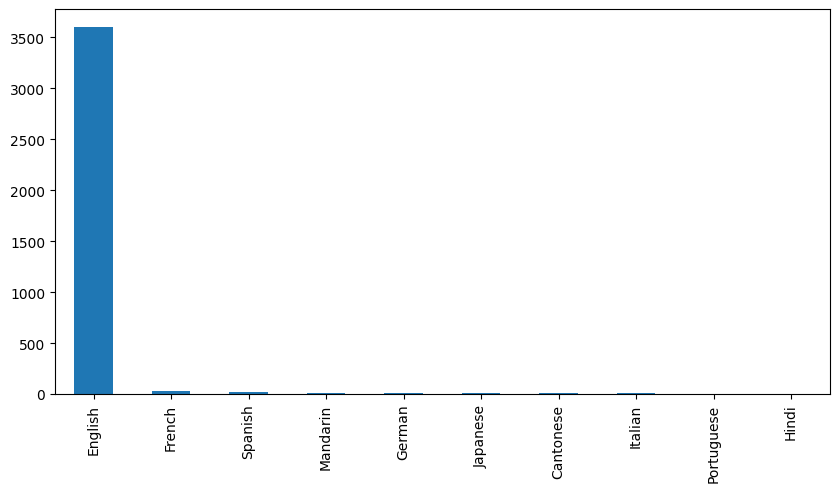

In [11]:
plt.figure(figsize=(10,5))
data['language'].value_counts()[0:10].plot.bar()

####*94 % of the movies are english*



In [12]:
#Check distribution
data.groupby('country')['country'].count()        

country
Afghanistan          1
Argentina            3
Aruba                1
Australia           39
Belgium              1
Brazil               5
Canada              59
Chile                1
China               13
Colombia             1
Czech Republic       3
Denmark              8
Finland              1
France             101
Georgia              1
Germany             80
Greece               1
Hong Kong           13
Hungary              2
Iceland              1
India                5
Indonesia            1
Iran                 4
Ireland              7
Israel               1
Italy               11
Japan               15
Mexico               6
Netherlands          3
New Line             1
New Zealand         11
Norway               4
Official site        1
Peru                 1
Poland               1
Romania              2
Russia               3
South Africa         3
South Korea          8
Spain               21
Taiwan               2
Thailand             4
UK                 318
USA

<Axes: >

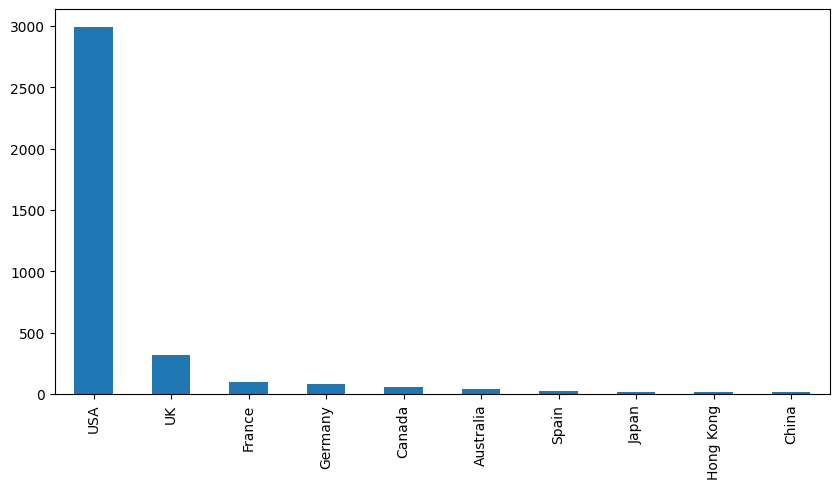

In [13]:
plt.figure(figsize=(10,5))
data['country'].value_counts()[0:10].plot.bar()

####*We can see most of the movies are from USA ,UK and the rest of the countries*

##2.5 Correlation

To find out whether there is any relation between variables, in other terms multicollineariaty.


In [14]:
# Correlation between Numeric columns
data.corr()

<ipython-input-14-2b0a33fb7875>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.084626,0.517751
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.068952,0.205564
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.018988,0.015185
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.098109,0.370465


<ipython-input-15-eaa018fca1c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, fmt='.2f')


<Axes: >

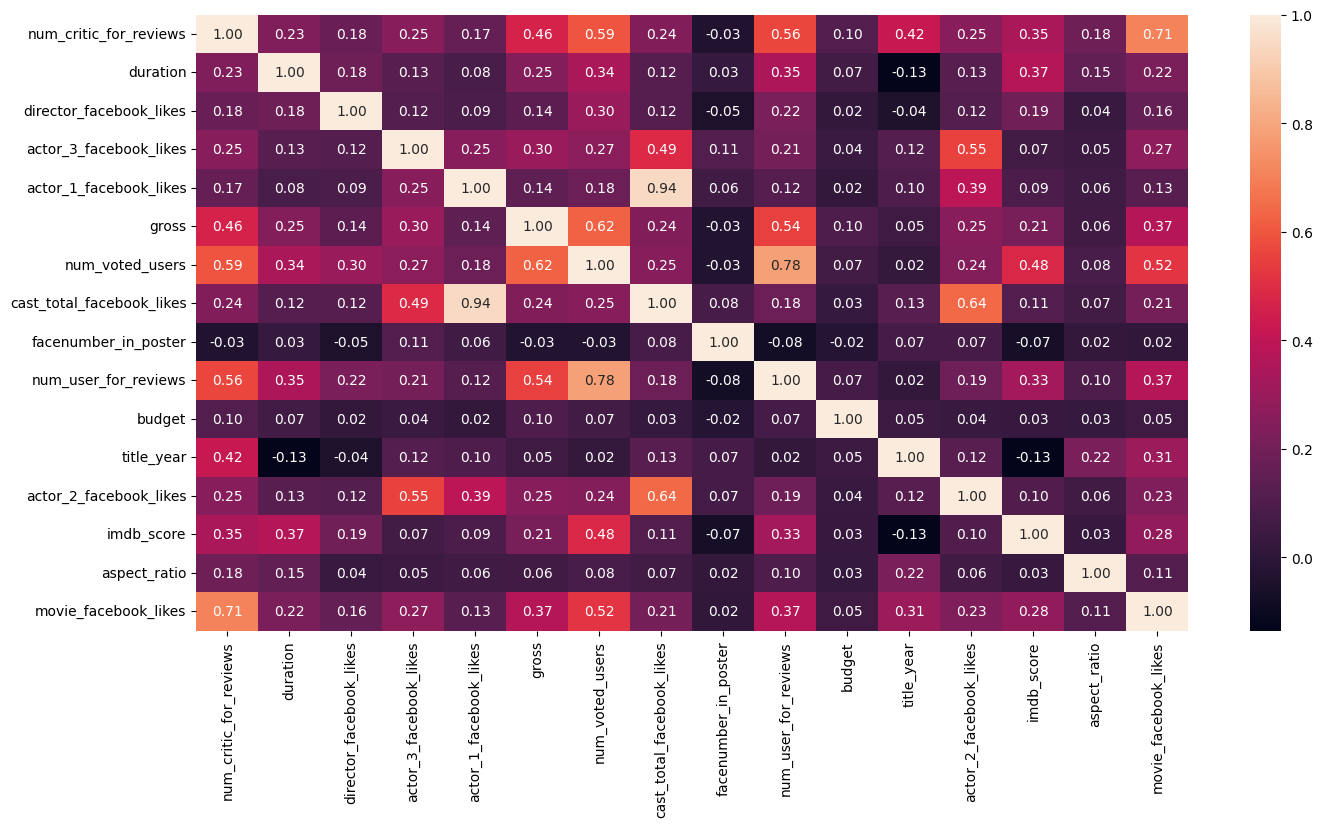

In [15]:
plt.subplots(figsize=(16,8))
sns.heatmap(data.corr(), annot = True, fmt='.2f')

From the above plot we can infer that most of the numerical features are weakly correlated with each other

# Visualization

In [16]:
data['genres'].value_counts()

Romance        720
Comedy         632
Drama          627
Adventure      266
Family         237
Music          226
Fantasy        172
Animation      169
Biography      168
Action         112
Sci-Fi         110
Mystery         90
Horror          85
Sport           65
History         45
Crime           16
Documentary     11
Western          2
War              2
Thriller         1
Name: genres, dtype: int64

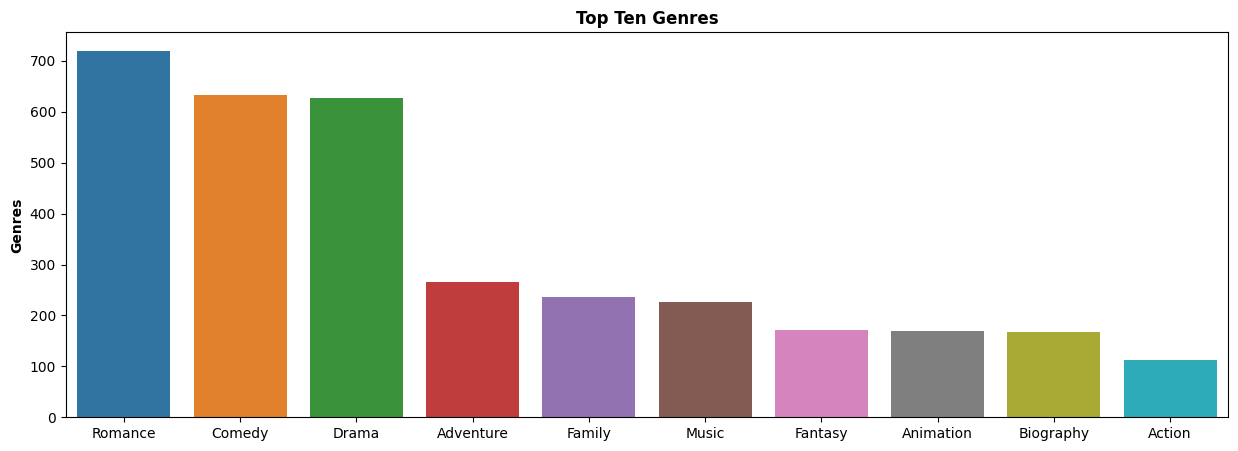

In [17]:
from collections import Counter
genre=data['genres']

count=Counter(genre)
count=count.most_common()[:10]
a,b=map(list,zip(*count))

fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(y=b,x=a)
g.set_ylabel("Genres", weight = "bold")
g.set_title("Top Ten Genres", weight = "bold")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


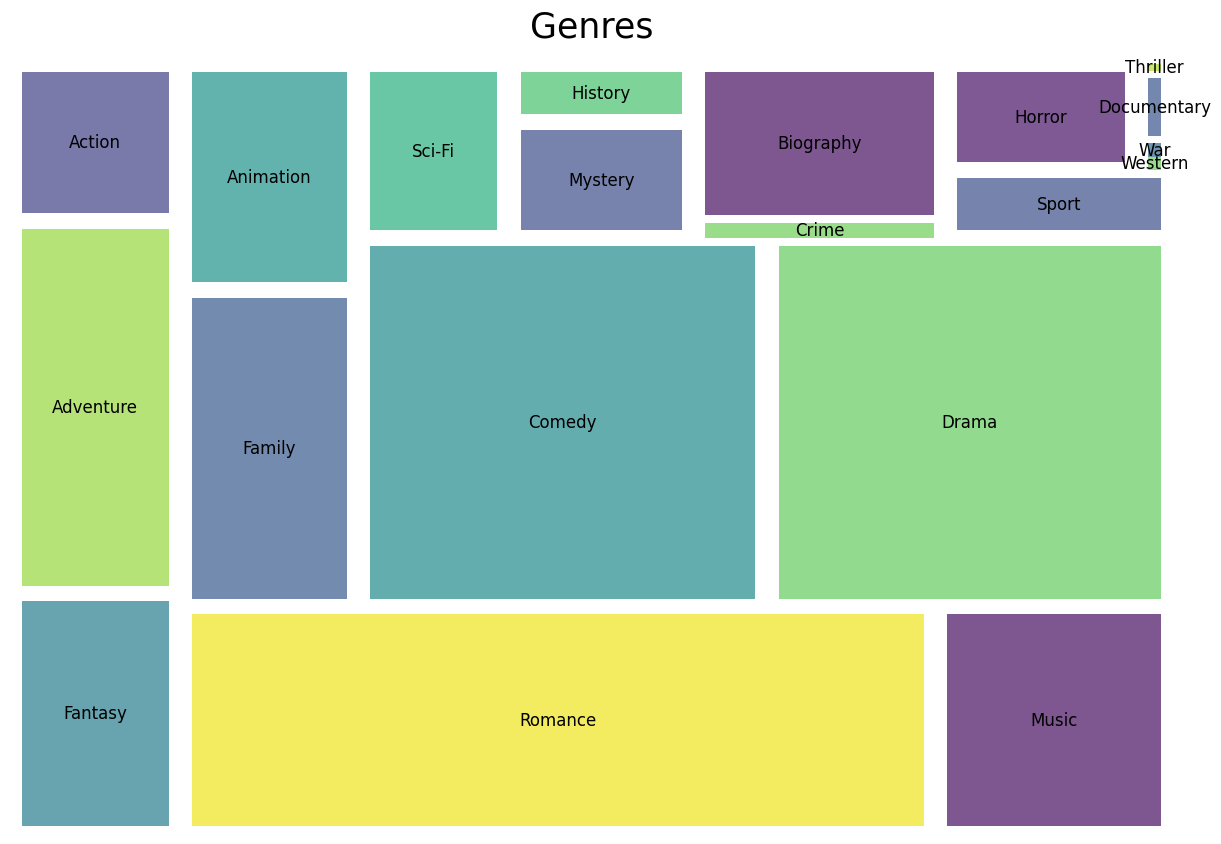

In [18]:
!pip install squarify
import squarify
genres_info = Counter(data['genres'])
genres_info

plt.figure(figsize=(15, 10))
plt.title("Genres", fontsize=25, pad=20)
squarify.plot(genres_info.values(), label=genres_info.keys(), text_kwargs={'fontsize':12}, bar_kwargs={'alpha':.7}, pad=True)
plt.axis("off");

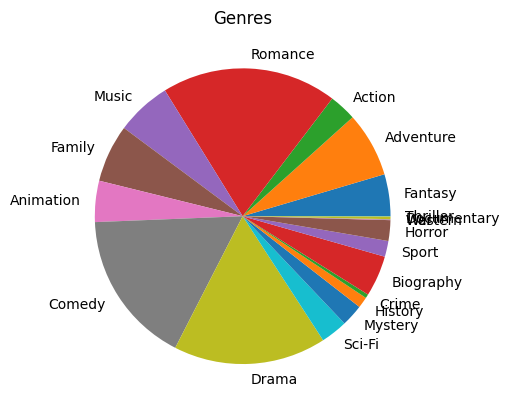

In [19]:
fig, ax = plt.subplots()
ax.pie(genres_info.values(), labels = genres_info.keys())
ax.set_title("Genres")
plt.show()

##Keywords popularity

<ipython-input-20-dd1ef072ec09>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.bar(top_keywords.keys(), top_keywords.values(), align='center', color=plt.cm.get_cmap('plasma', top_keywords_num).colors)


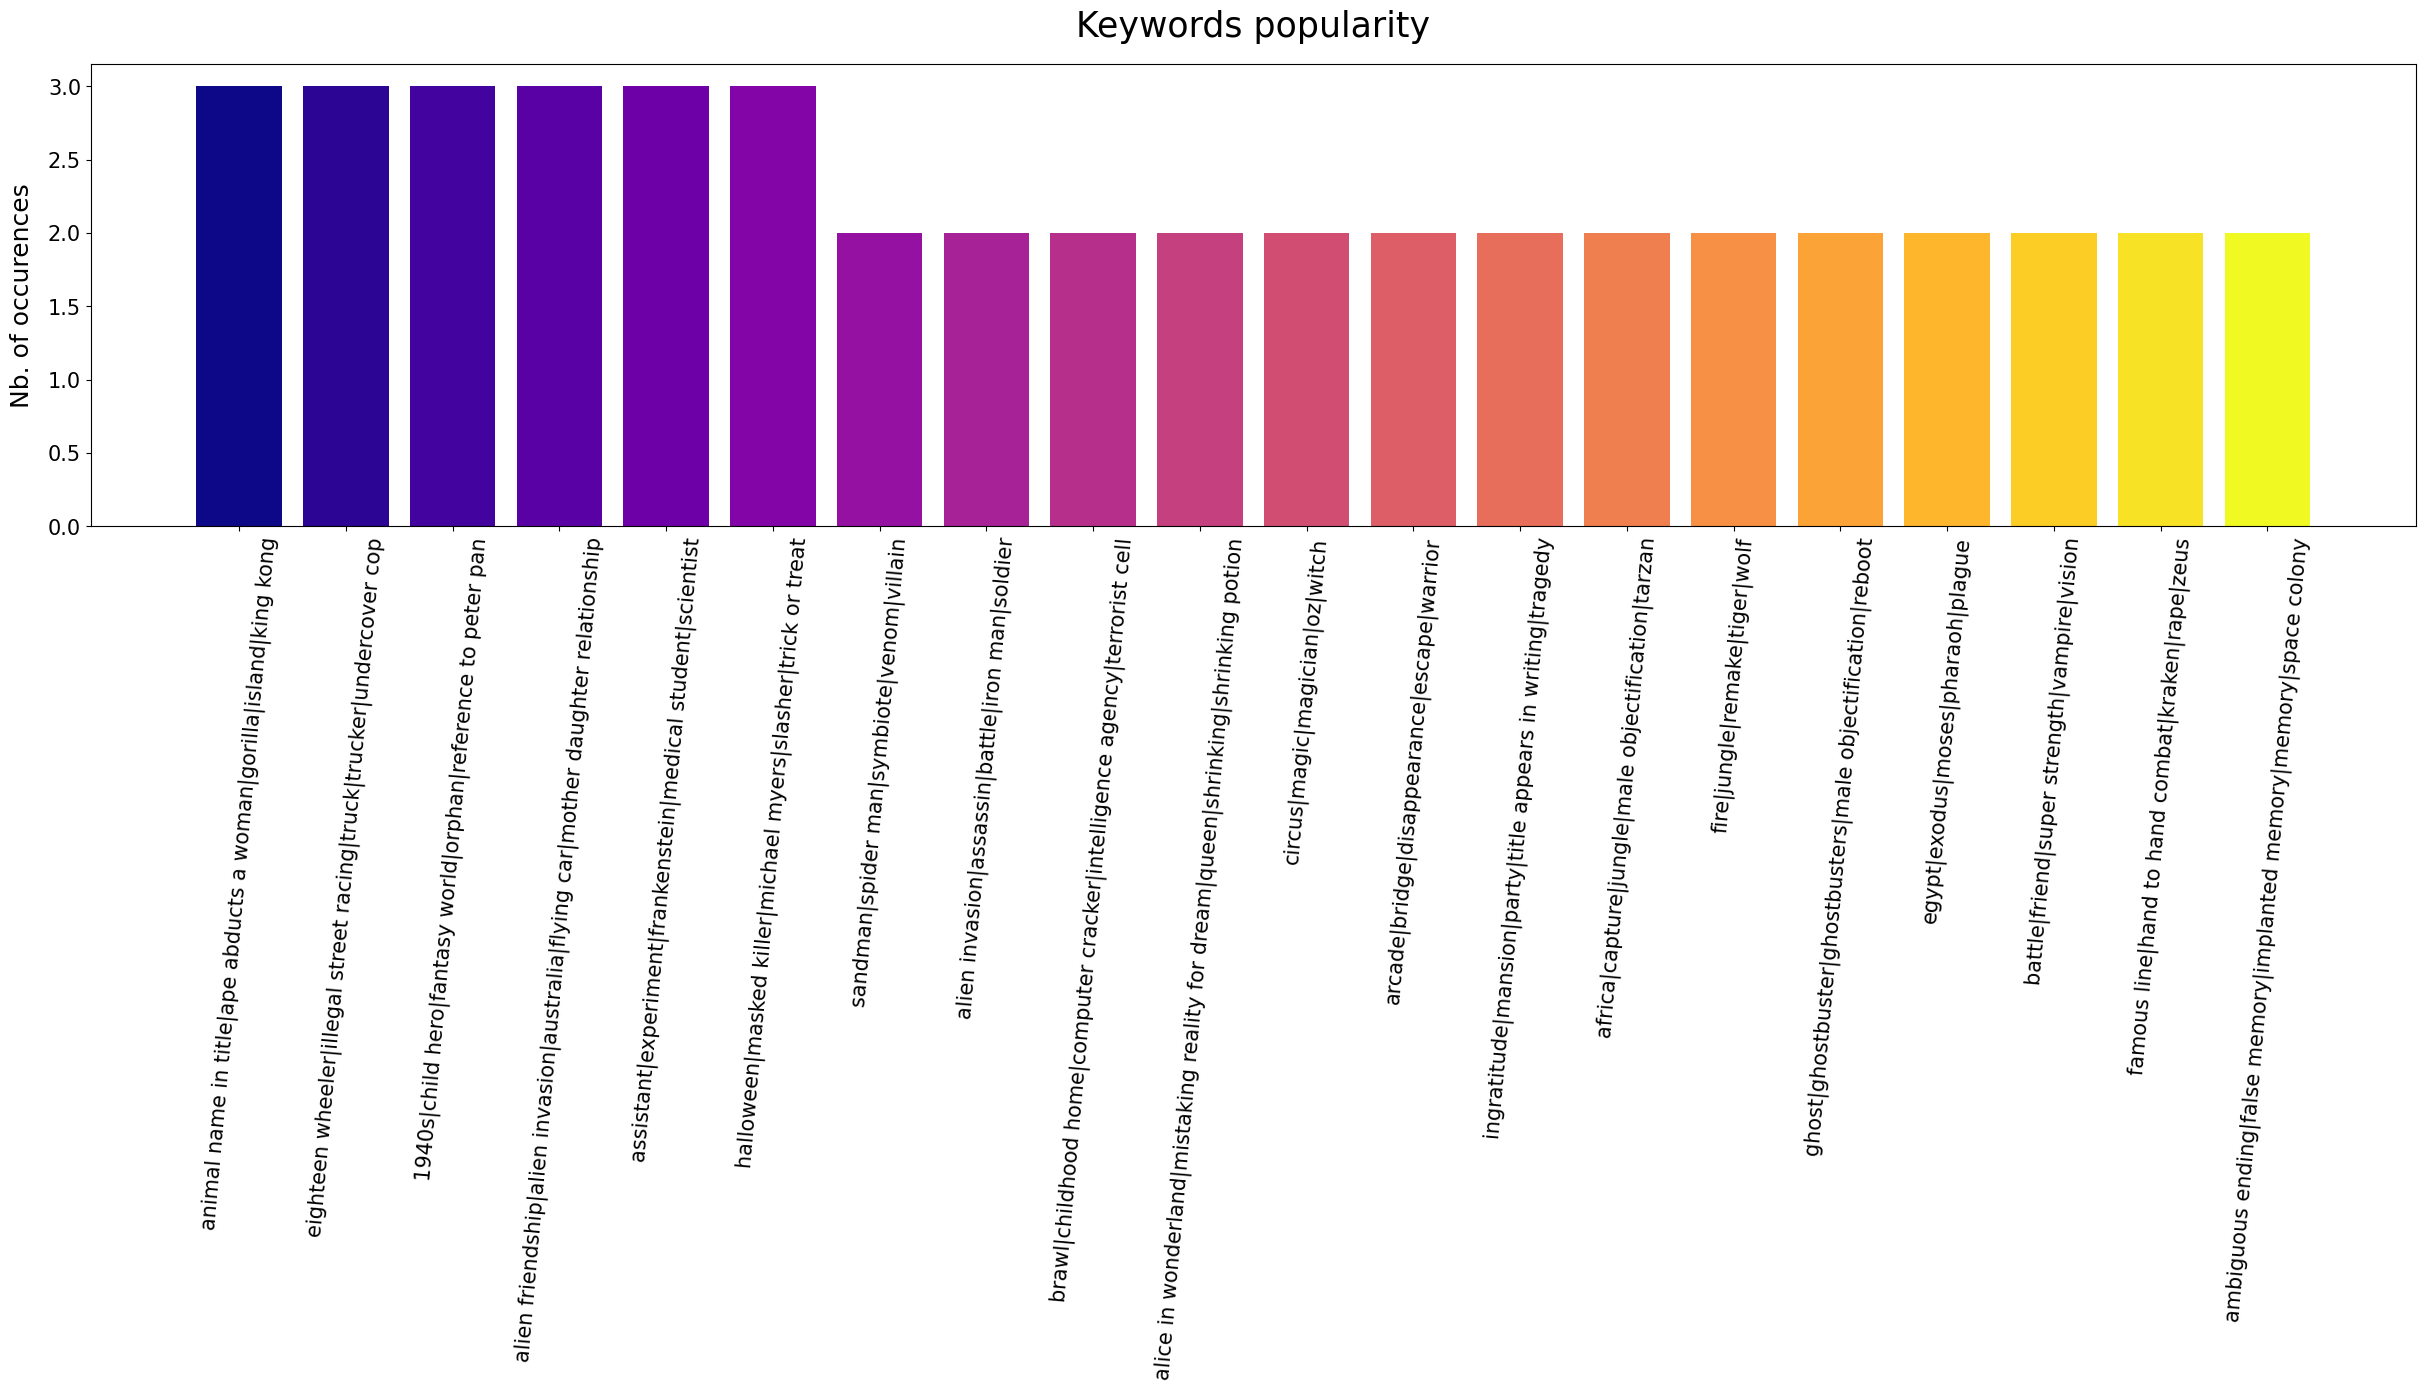

In [20]:
top_keywords_num = 20
keywords_info = Counter(data["plot_keywords"])
top_keywords = dict(keywords_info.most_common(top_keywords_num))

plt.figure(figsize=(30, 6))
plt.xticks(rotation=85, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Nb. of occurences", fontsize=18, labelpad=10)
plt.bar(top_keywords.keys(), top_keywords.values(), align='center', color=plt.cm.get_cmap('plasma', top_keywords_num).colors)
plt.title("Keywords popularity", fontsize=25, pad=20)
plt.show()

###Top voted movies

In [21]:
top_voted = data.sort_values(['num_voted_users'], ascending = False)

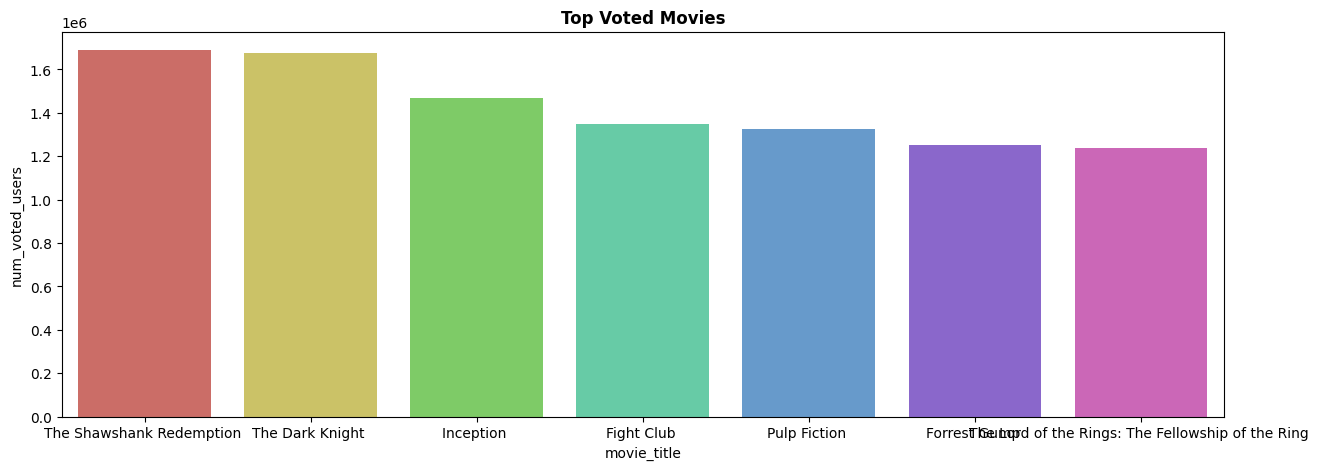

In [22]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['movie_title'][:7],y=top_voted['num_voted_users'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

###Top voted movies ratings

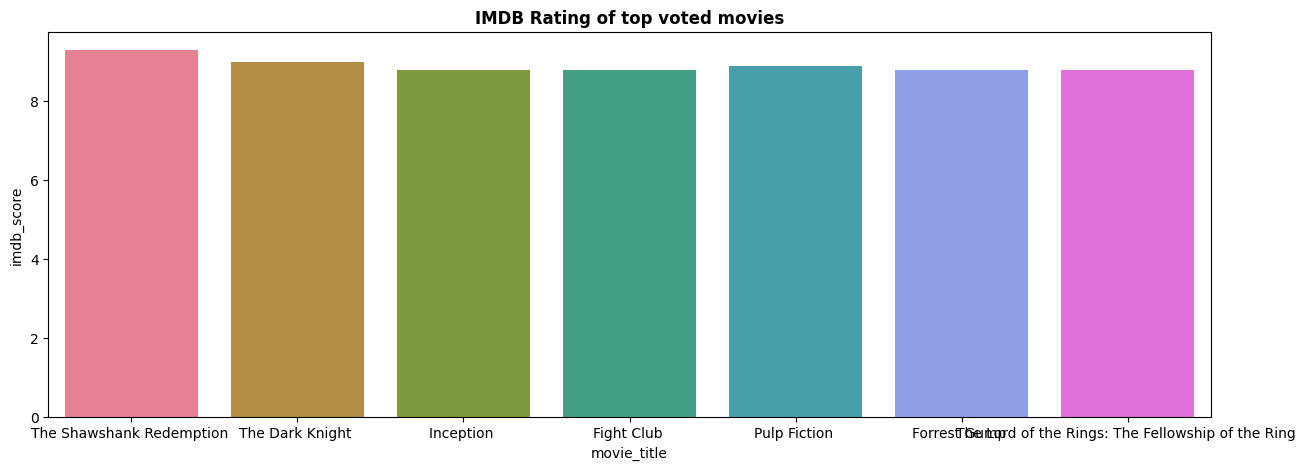

In [23]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['movie_title'][:7],y=top_voted['imdb_score'][:7], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()

<ipython-input-24-a122fca93eee>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g=sns.lineplot(x=data['genres'][:7],y=data['facenumber_in_poster'][:7], palette = 'husl')


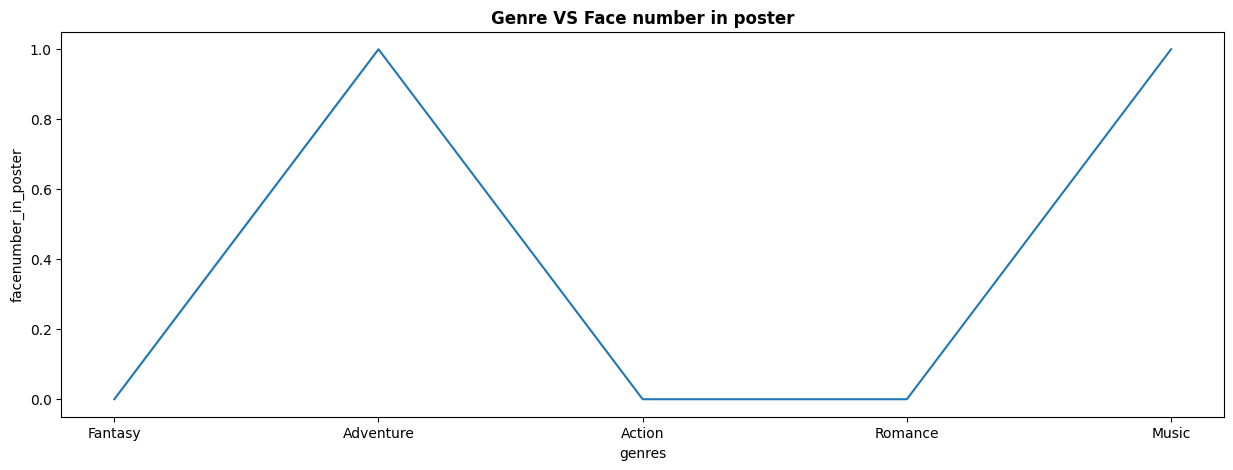

In [24]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.lineplot(x=data['genres'][:7],y=data['facenumber_in_poster'][:7], palette = 'husl')
g.set_title("Genre VS Face number in poster", weight = "bold")
plt.show()

###Maximum movies released in-(year)

In [25]:
# coverting datatype of title_year 
data["title_year"] = data["title_year"].astype(int)


x=data['title_year'].value_counts()[:15]
x

2002    190
2006    189
2009    182
2008    182
2005    182
2004    181
2001    179
2010    168
2011    168
2013    163
2000    159
2012    158
1999    157
2007    152
2003    145
Name: title_year, dtype: int64

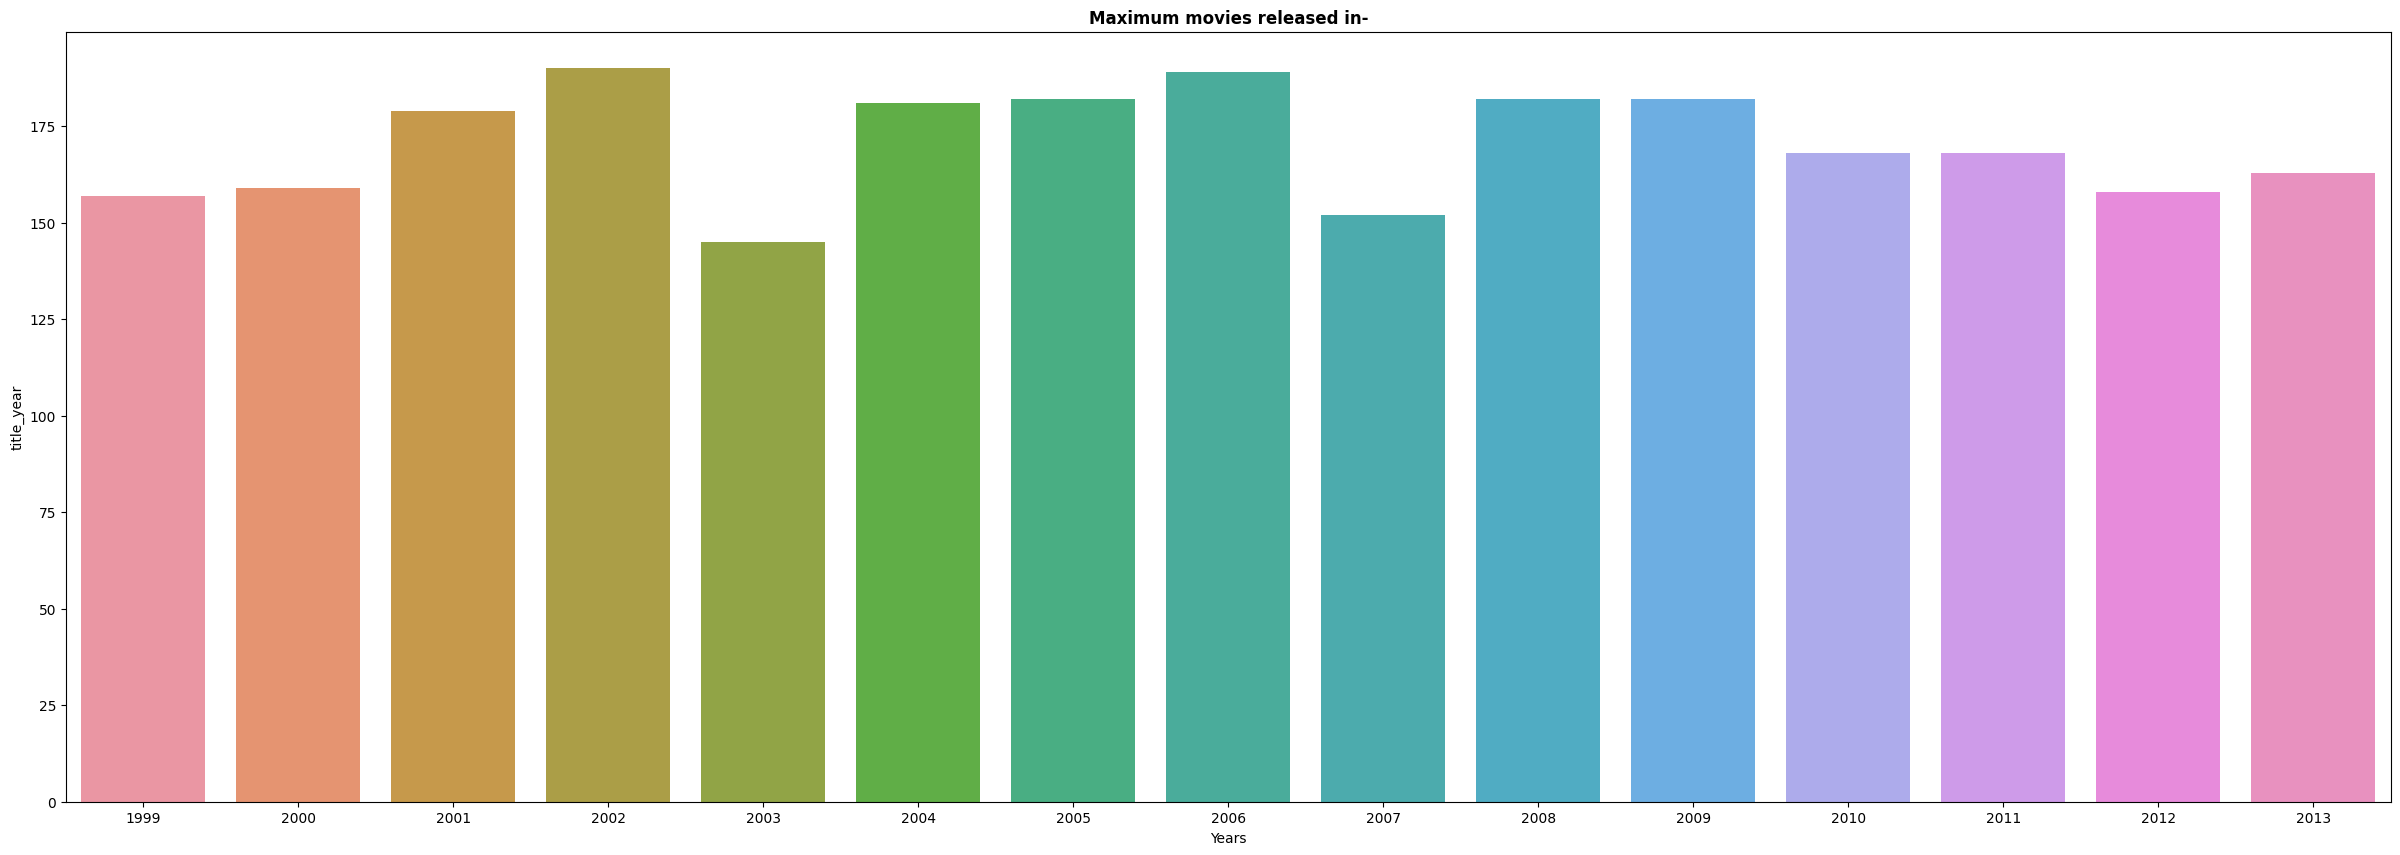

In [26]:
fig,axs=plt.subplots(figsize=(30,10))
g=sns.barplot(x=data['title_year'].value_counts()[:15].index,y=data['title_year'].value_counts()[:15])
g.set_title("Maximum movies released in-", weight = "bold")
g.set_xlabel("Years")
plt.show()

###Mostly occurred Directors

In [27]:
top_directors = data["director_name"].value_counts()
top_directors.head(10)



Steven Spielberg     25
Clint Eastwood       19
Woody Allen          19
Ridley Scott         17
Martin Scorsese      16
Steven Soderbergh    16
Tim Burton           16
Spike Lee            15
Renny Harlin         15
Ron Howard           13
Name: director_name, dtype: int64

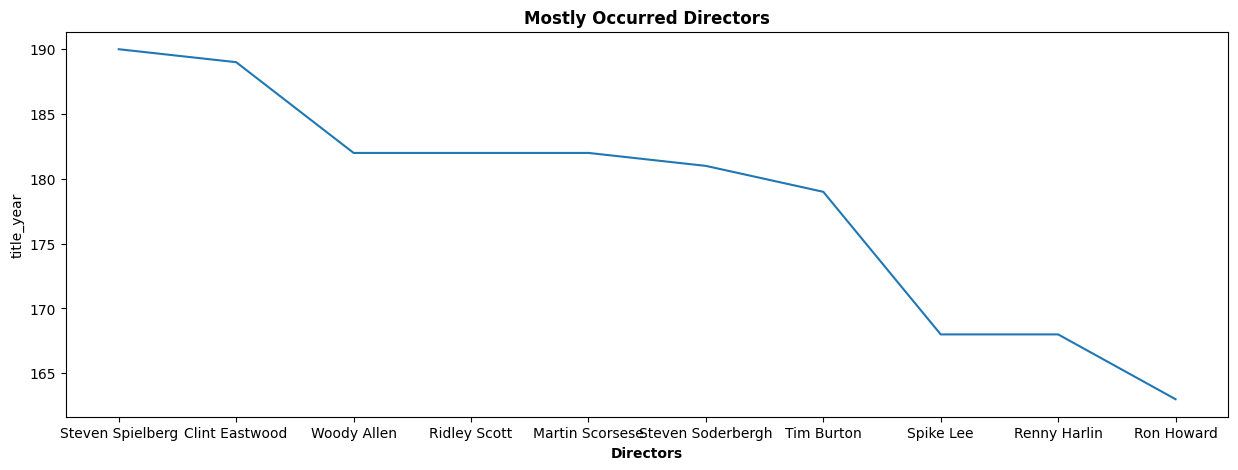

In [28]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.lineplot(x=data['director_name'].value_counts()[:10].index,y=data['title_year'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

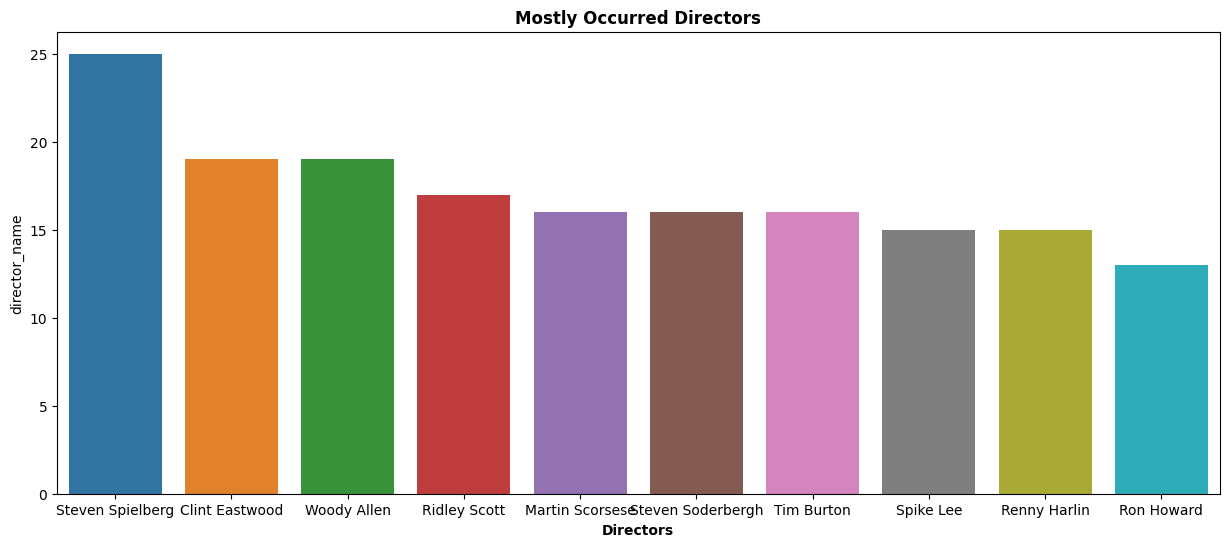

In [29]:
fig,axs=plt.subplots(figsize=(15,6))
g=sns.barplot(x=data['director_name'].value_counts()[:10].index,y=data['director_name'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

### Runtime of movie

Text(0.5, 1.0, 'Time Duration of movies')

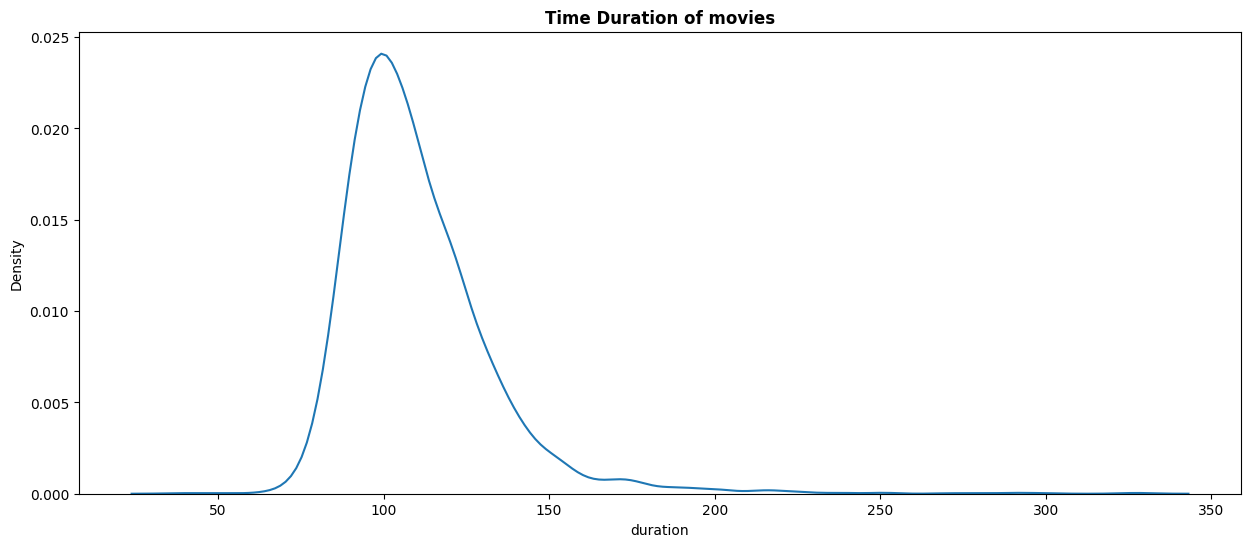

In [30]:
fig,axs=plt.subplots(figsize=(15,6))
g=sns.kdeplot(data['duration'])
g.set_title("Time Duration of movies", weight = "bold")

###Stars with most Occurences in movies

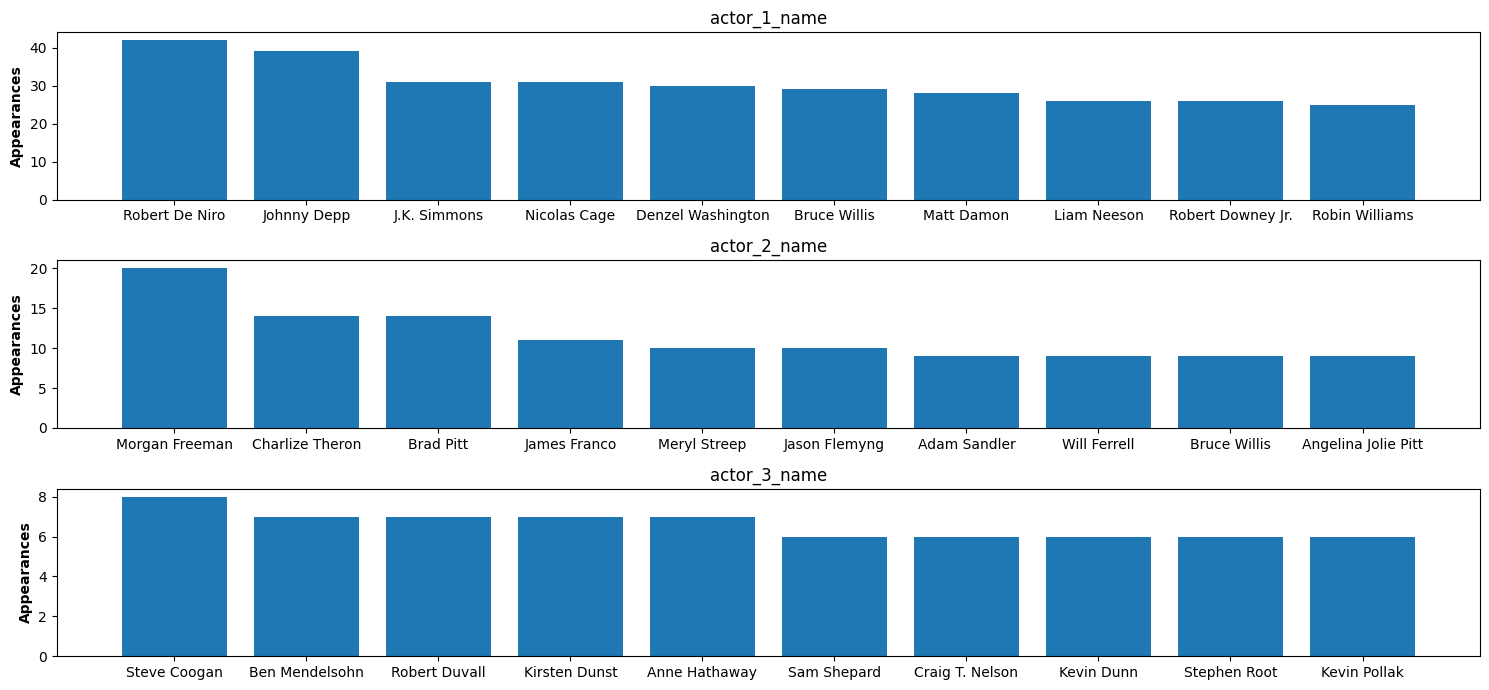

In [31]:
stars=['actor_1_name','actor_2_name','actor_3_name']
fig,axs=plt.subplots(3,1,figsize=(15,7))
ax=0
for x in stars:
    axs[ax].bar(data[x].value_counts()[:10].index,data[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

###Appearances of Stars in Top voted movies

<ipython-input-32-9951f51e70ce>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-32-9951f51e70ce>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()
<ipython-input-32-9951f51e70ce>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s=data.groupby([x]).sum().reset_index()


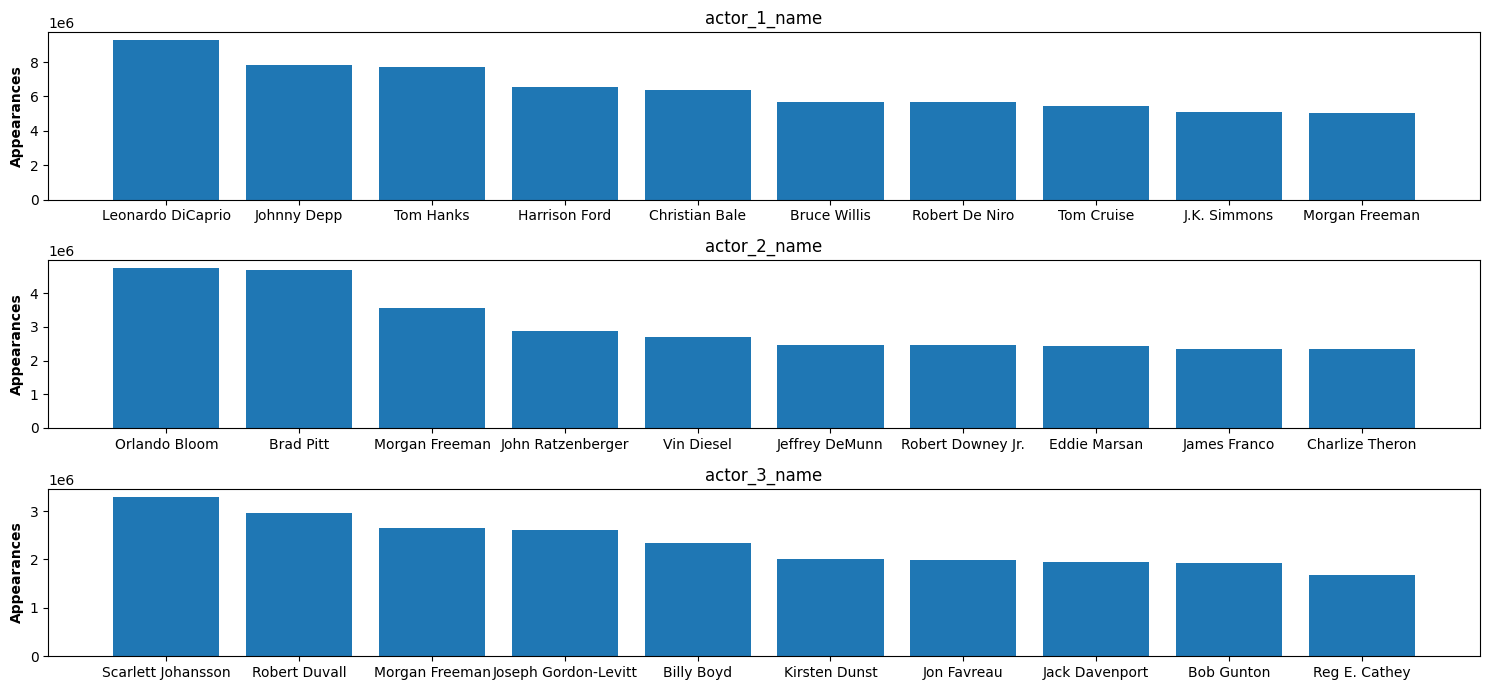

In [32]:
stars=['actor_1_name','actor_2_name','actor_3_name']
fig,axs=plt.subplots(3,1,figsize=(15,7))
ax=0
for x in stars:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['num_voted_users'],ascending=False)[:10]
    axs[ax].bar(d[x],d['num_voted_users'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

##Content Rating

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'G'),
  Text(3, 0, 'R'),
  Text(4, 0, 'Approved'),
  Text(5, 0, 'NC-17'),
  Text(6, 0, 'X'),
  Text(7, 0, 'Not Rated'),
  Text(8, 0, 'Unrated'),
  Text(9, 0, 'M'),
  Text(10, 0, 'GP'),
  Text(11, 0, 'Passed')])

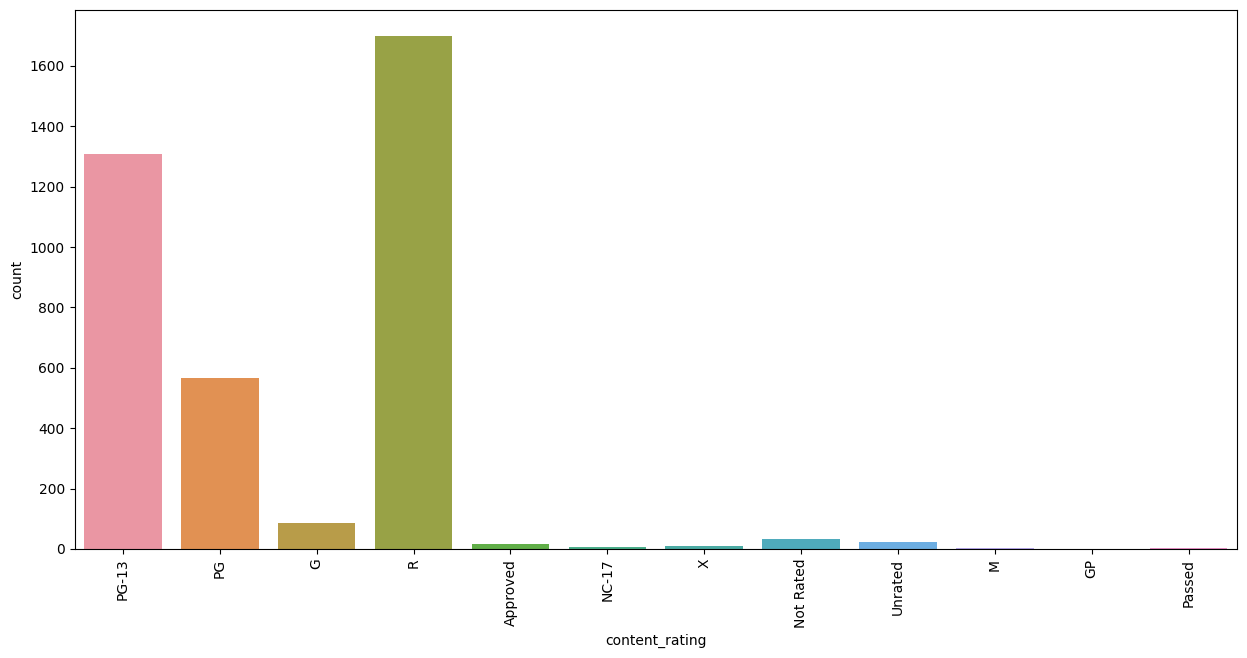

In [33]:
plt.figure(figsize=(15, 7))
plot = sns.countplot(x='content_rating', data=data)
plt.xticks(rotation = 90)

Here Ratings are as Follows:

R = Restricted
G = General Audience
PG = Parental Guidance
PG-13 = Parents Strongly Cautioned
TV-14 = US equivalent of PG-13 except for 14 and Below
X = Adults only
NC-17 = New version of X

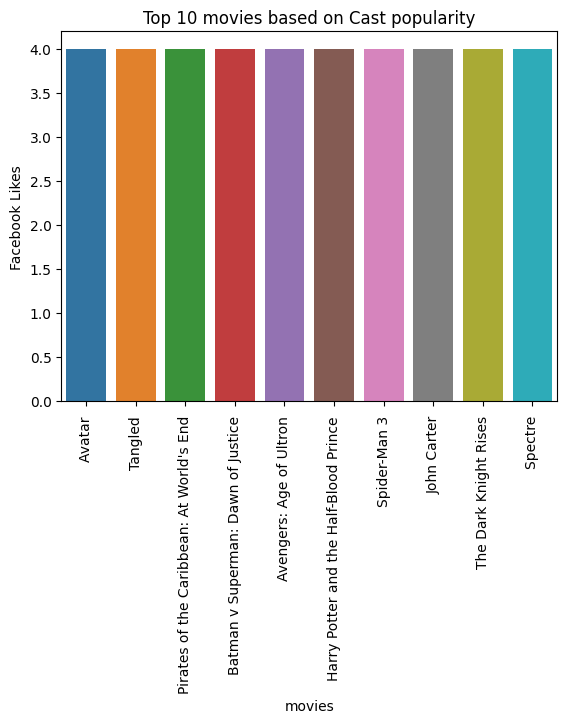

In [34]:
top10 = data['cast_total_facebook_likes'].value_counts().reset_index().sort_values(by='cast_total_facebook_likes', ascending=False).head(10)
temp = []
for i in range(10):
    temp.append(data.movie_title.iloc[[top10.index[i]]].values)
movies = []
for i in range(10):
    movies.append(temp[i][0])
top10 = pd.DataFrame(zip(movies, top10.cast_total_facebook_likes), columns=['movies', 'likes'])
top10
plt.title('Top 10 movies based on Cast popularity')
sns.barplot(data=top10, x='movies', y='likes')
plt.xticks(rotation=90)
plt.ylabel('Facebook Likes')
plt.show()